# Face Mask Detection Dataset

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps, ImageDraw
import PIL
import os

# first face detection algo
import face_recognition

# for the second face detection algo
import cv2
import mediapipe as mp

In [3]:
# paths for the pictures from teh WWMR database
fmd_image_root =  r'D:\data\face_mask\FaceMaskDetection\images'

## First face detection method

In [4]:
test_img_name = 'maksssksksss96.png'
test_img_fp = os.path.join(fmd_image_root, test_img_name)

In [5]:
img = face_recognition.load_image_file(test_img_fp)

face_locs = face_recognition.face_locations(img)

In [6]:
face_locs

[(151, 108, 194, 64), (86, 281, 122, 245)]

In [7]:
pil_image = Image.fromarray(img)
img1 = ImageDraw.Draw(pil_image)

for face in face_locs:
    t, l, b, r = face
    face1 = [(l, t), (r, b)]
    img1.rectangle(face1, outline='red')

In [8]:
pil_image.show()

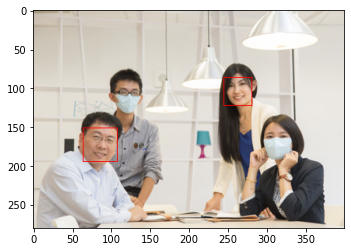

In [9]:
imgplot = plt.imshow(img1._image)

Not all faces are detected however.

## Second face detection method

In [10]:
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

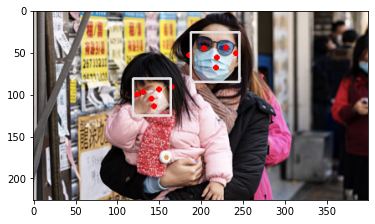

In [11]:

IMAGE_FILES = [r'D:\data\face_mask\FaceMaskDetection\images\maksssksksss100.png']

with mp_face_detection.FaceDetection(
    model_selection=1, min_detection_confidence=0.5) as face_detection:
    for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
        results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        #print(results.detections)

        
        # Draw face detections of each face.
        if not results.detections:
              continue
        annotated_image = image.copy()
        for detection in results.detections:
              mp_drawing.draw_detection(annotated_image, detection)
        #cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

Google's media pipe works significantly better thant face_detection. Significanly higher detection rate, much less of the data will be lost because the faces were not detected. 

In [17]:
results.detections[0]

label_id: 0
score: 0.9093666076660156
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.4705358147621155
    ymin: 0.11944395303726196
    width: 0.14672362804412842
    height: 0.2596897482872009
  }
  relative_keypoints {
    x: 0.5108768343925476
    y: 0.20117676258087158
  }
  relative_keypoints {
    x: 0.5758687257766724
    y: 0.19650107622146606
  }
  relative_keypoints {
    x: 0.54831463098526
    y: 0.25126969814300537
  }
  relative_keypoints {
    x: 0.5455660820007324
    y: 0.30362606048583984
  }
  relative_keypoints {
    x: 0.4667125344276428
    y: 0.23753827810287476
  }
  relative_keypoints {
    x: 0.6072602272033691
    y: 0.22768235206604004
  }
}